Загрузка всех необходимых библиотек

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'russian-voice-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3415744%2F6131341%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240924%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240924T134305Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3f2df142e48348fd55fc1af34a9967a1ad40e7ef05844abe452952a70310c170c4f6dc85051c4b6599e079728e56719351433d311a3f78335b5f6c74882d205d90a6d83c441bcad25728a9fab8f415986cb59d92759819b9071f51f377be59c5a346a8c0255efee092b54aa1a6172980fcb140da6f47bf2a45f35bfbeee2693231ac4050725539d32e082aeda0a9870b60fa19ac378034886f15601c2f60312e3c5b8b067cc3417bfc55d3493fea8a048b7383e5c0de3309b17262a3895c82ce90f6c974780d274ab56b2fe90c5e7ecd9c2005a1203dea23ea6e52b6d654897abdea3c3e703ee5590f624adc245807632b211be6cc2f838b37d399433665cd19'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continuepplcontinueppllllllllllllllolllllloo
        ollllllllllllollolllllloo
        o
llllllllllollolllllloo
        o
    exllexll9 molllmollllmolllllll
  l
lllllollll
ollolllllolllllllolllllolllllllllllllllolllllll)








ll l

l
llollololll














)
    exceexceptpt OSError as e:
  exceptprint(f'Failed to load {download_url} to path {destination_path}')
        mil
        continueol
        continue)continuellcontinue

print('Data source import complete.')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 71)

In [ ]:
# Create a directory for the Kaggle API credentials and move kaggle.json there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Verify that Kaggle is set up correctly
!kaggle datasets list


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
# Download the Russian Voice Dataset
!kaggle datasets download -d mhantor/russian-voice-dataset

# Unzip the dataset
!unzip russian-voice-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/mhantor/russian-voice-dataset
License(s): apache-2.0
100% 1.29G/1.30G [01:03<00:00, 24.0MB/s]
100% 1.30G/1.30G [01:03<00:00, 22.1MB/s]
Archive:  russian-voice-dataset.zip
  inflating: Disorder Voices/Disorder Voices/1.wav  
  inflating: Disorder Voices/Disorder Voices/10.wav  
  inflating: Disorder Voices/Disorder Voices/100.wav  
  inflating: Disorder Voices/Disorder Voices/1000.wav  
  inflating: Disorder Voices/Disorder Voices/1001.wav  
  inflating: Disorder Voices/Disorder Voices/1002.wav  
  inflating: Disorder Voices/Disorder Voices/1003.wav  
  inflating: Disorder Voices/Disorder Voices/1004.wav  
  inflating: Disorder Voices/Disorder Voices/1005.wav  
  inflating: Disorder Voices/Disorder Voices/1006.wav  
  inflating: Disorder Voices/Disorder Voices/1007.wav  
  inflating: Disorder Voices/Disorder Voices/1008.wav  
  inflating: Disorder Voices/Disorder Voices/1009.wav  
  inflating: Disorder Voices/Disorder Voices/101.wav  
  infla

In [ ]:
# List files in the current directory
!ls


'Disorder Voices'  'Normal Voices'   russian-voice-dataset.zip	 sample_data   Speeches.xlsx


In [ ]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

In [ ]:
# !pip install -q --upgrade keras-nlp tensorflow
# from keras_nlp.metrics import EditDistance
#Понадобится при вычислении wer/cer

Загрузим мел-кептральные графики аудиозаписи нормального голоса и аномального.

In [ ]:
def load_audio(AUDIO_PATH):
    audio, sr = librosa.load(AUDIO_PATH)
    return audio, sr

def wav2melSpec(AUDIO_PATH):
    audio, sr = librosa.load(AUDIO_PATH)
    return librosa.feature.melspectrogram(y=audio, sr=sr)

def imgSpec(ms_feature):
    fig, ax = plt.subplots()
    ms_dB = librosa.power_to_db(ms_feature, ref=np.max)
    print(ms_feature.shape)
    img = librosa.display.specshow(ms_dB, x_axis='time', y_axis='mel', ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram');

def hear_audio(AUDIO_PATH):
    audio, sr = librosa.load(AUDIO_PATH)
    print("\t", end="")
    ipd.display(ipd.Audio(data=audio, rate=sr))


def get_audio_info(path, show_melspec=False, label=None):
    spec = wav2melSpec(path)
    if label is not None:
        print("Label:", label)
    if show_melspec is not False:
        imgSpec(spec)
    hear_audio(path)

(128, 216)
	

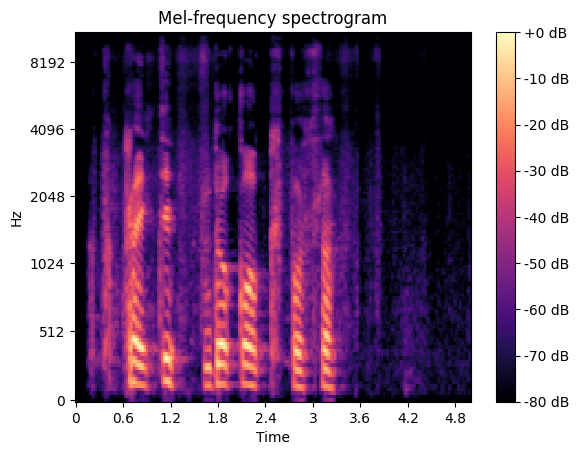

In [ ]:
get_audio_info('Disorder Voices/Disorder Voices/1.wav', show_melspec=True)

In [ ]:


# Define dataset path
dataset_path = 'russian-voice-dataset'

# List all files and directories in the dataset path
def list_files_and_directories(base_path):
    for root, dirs, files in os.walk(base_path):
        print(f'Root: {root}')
        for dir in dirs:
            print(f'Directory: {os.path.join(root, dir)}')
        for file in files:
            print(f'File: {os.path.join(root, file)}')



In [ ]:
import pandas as pd
import os

# Define paths to the audio directories and metadata file
dataset_path = 'russian-voice-dataset'
normal_voices_path = 'Normal voices'
disordered_voices_path = 'Disordered voices'
metadata_path =  'Speeches.xlsx'

# Load metadata CSV file
metadata = pd.read_excel(metadata_path)
print(metadata.head())


   Число            Русская речь
0      1  Как пройти до корпуса?
1      2  Где взять направление?
2      3             Бумага есть
3      4                анальгин
4      5                    вата


In [ ]:
import os

# Define base paths for normal and disordered voices
base_normal_voices_path = 'Normal Voices/Normal Voices'
base_disordered_voices_path = 'Disorder Voices/Disorder Voices'

# Function to list .wav files in a directory
def list_wav_files(directory):
    wav_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):
                wav_files.append(os.path.join(root, file))
    return wav_files

# List .wav files in both directories
normal_wav_files = list_wav_files(base_normal_voices_path)
disordered_wav_files = list_wav_files(base_disordered_voices_path)

print(f'Normal Voices Files: {normal_wav_files[:5]}')  # Print first 5 files for verification
print(f'Disordered Voices Files: {disordered_wav_files[:5]}')  # Print first 5 files for verification


Normal Voices Files: ['Normal Voices/Normal Voices/1902.wav', 'Normal Voices/Normal Voices/1089.wav', 'Normal Voices/Normal Voices/1892.wav', 'Normal Voices/Normal Voices/1416.wav', 'Normal Voices/Normal Voices/122.wav']
Disordered Voices Files: ['Disorder Voices/Disorder Voices/1902.wav', 'Disorder Voices/Disorder Voices/1089.wav', 'Disorder Voices/Disorder Voices/1892.wav', 'Disorder Voices/Disorder Voices/1416.wav', 'Disorder Voices/Disorder Voices/122.wav']


In [ ]:
import librosa
import numpy as np

def load_audio(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        return y, sr
    except Exception as e:
        print(f'Error loading {file_path}: {e}')
        return None, None

def preprocess_audio(y, sr):
    if y is None or sr is None:
        return None
    y = y / np.max(np.abs(y))  # Normalize audio
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCCs
    return mfccs


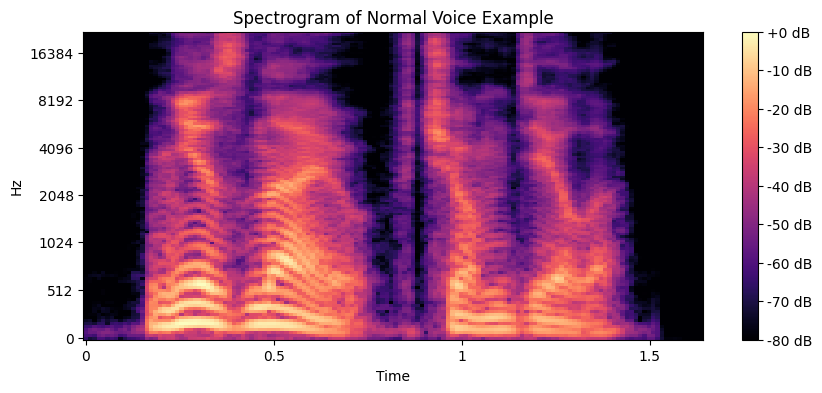

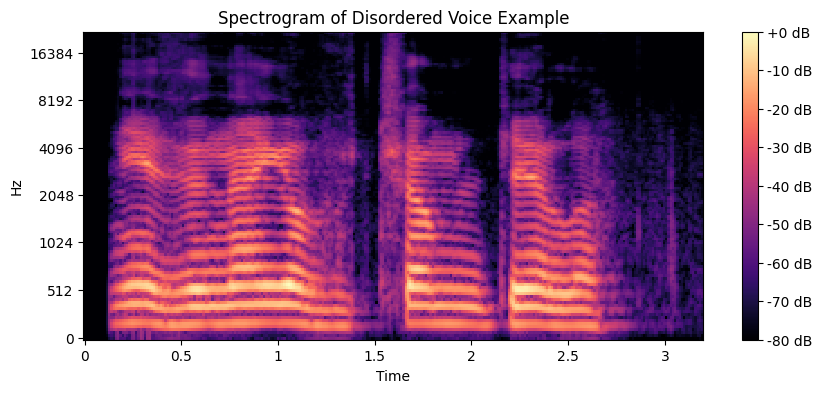

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate and display a spectrogram
def plot_spectrogram(y, sr, title='Spectrogram'):
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Example usage with one file
if normal_wav_files:
    example_file = normal_wav_files[0]  # Take the first file for demonstration
    y, sr = load_audio(example_file)
    plot_spectrogram(y, sr, title='Spectrogram of Normal Voice Example')

if disordered_wav_files:
    example_file = disordered_wav_files[0]  # Take the first file for demonstration
    y, sr = load_audio(example_file)
    plot_spectrogram(y, sr, title='Spectrogram of Disordered Voice Example')


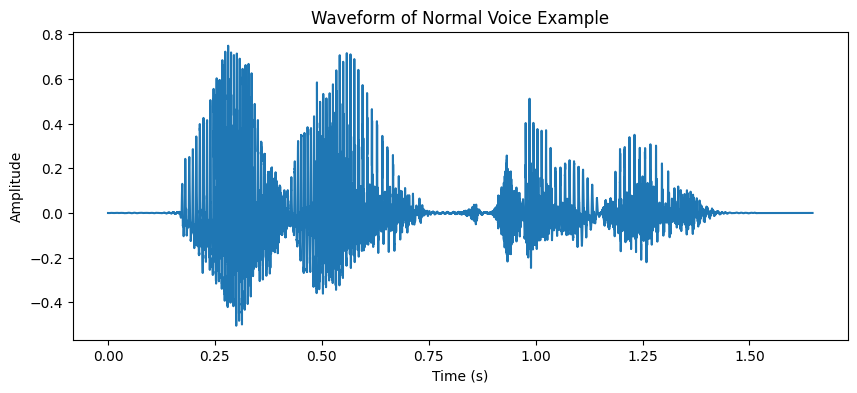

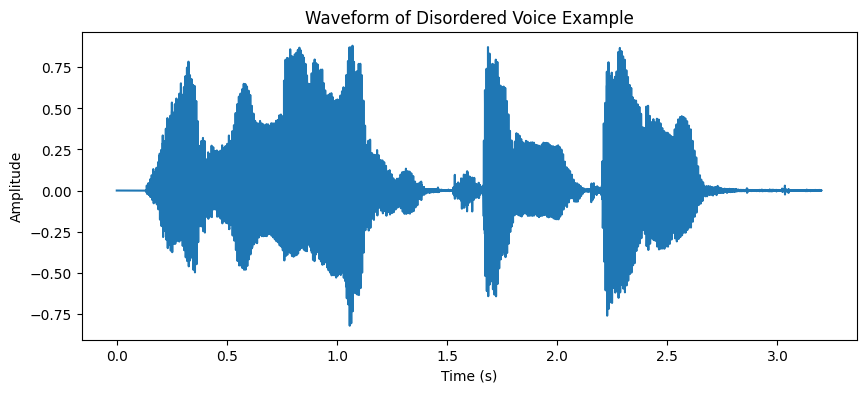

In [ ]:
def plot_waveform(y, sr, title='Waveform'):
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Example usage with one file
if normal_wav_files:
    example_file = normal_wav_files[0]  # Take the first file for demonstration
    y, sr = load_audio(example_file)
    plot_waveform(y, sr, title='Waveform of Normal Voice Example')

if disordered_wav_files:
    example_file = disordered_wav_files[0]  # Take the first file for demonstration
    y, sr = load_audio(example_file)
    plot_waveform(y, sr, title='Waveform of Disordered Voice Example')


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import entropy
import librosa
from sklearn.utils import shuffle
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)  # Average MFCCs for simplicity
# Load dataset (you can replace it with actual RSDA data)
X = []  # Features (MFCCs or other relevant features)
y = []  # Labels (0 for healthy, 1 for pathological)

# Simulate dataset with 100 samples (for demonstration)
j=0

for i in normal_wav_files:
    X.append(extract_features(i))
    y.append(0)
    j=j+1
    if(j==100):
      break
for i in disordered_wav_files :
  X.append(extract_features(i))
  y.append(1)
  j=j+1
  if(j==100):
    break
X = np.array(X)
y = np.array(y)


In [ ]:
X[0:5]

array([[-3.7629831e+02,  1.2947606e+02, -5.6005864e+00,  2.6831841e+01,
         8.3507299e+00,  1.8157608e+01,  4.1082077e+00, -1.9853141e+00,
         9.0957956e+00, -7.7705050e+00,  4.3416145e-01,  1.5884995e+00,
         2.1449759e+00],
       [-3.5839420e+02,  1.3659232e+02, -3.3404069e+00,  4.6425961e+01,
         8.4211655e+00,  1.6069897e+01, -2.5465052e+00, -4.9684448e+00,
         1.5300231e+01, -8.0544500e+00, -9.6945345e-02, -2.1583126e+00,
        -5.2557015e+00],
       [-4.0786493e+02,  1.1137847e+02,  1.7829382e+01,  3.1786787e+01,
         1.0257064e+01,  8.3084717e+00,  2.0816681e+00,  6.5210981e+00,
         1.8630630e+01, -5.1650443e+00, -1.4423903e+00,  4.4913983e+00,
        -2.7137549e+00],
       [-3.7023199e+02,  1.3463512e+02, -6.7639327e+00,  1.7176342e+01,
        -1.4181056e+00,  1.4098319e+01,  1.5137688e+00, -7.5686054e+00,
         7.6205554e+00, -7.3273907e+00, -7.8543365e-01,  1.3038329e+00,
         3.1977215e+00],
       [-5.9581805e+02,  3.2932064e+

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43,shuffle=True)


In [ ]:
from sklearn.utils import shuffle
# Shuffle the dataset before splitting
X, y = shuffle(X, y, random_state=42)


In [ ]:
# Check for overlap between training and testing sets
overlap = np.intersect1d(X_train, X_test)
print(f"Overlap between training and testing sets: {len(overlap)} samples")


Overlap between training and testing sets: 1 samples


In [ ]:
# Check for duplicate entries
duplicates = np.sum(np.all(X_train == X_test[:, None], axis=-1))
print(f"Number of duplicate samples between training and testing: {duplicates}")


Number of duplicate samples between training and testing: 0


In [ ]:
# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f"Training set class distribution: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Testing set class distribution: {dict(zip(unique, counts))}")


Training set class distribution: {0: 83, 1: 1597}
Testing set class distribution: {0: 17, 1: 403}


In [ ]:

# Calculate KLD between two feature distributions

def kullback_leibler_divergence(p, q):
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    return entropy(p, q)




# Calculate KLD for training and testing sets
kld_train = []
for i in range(len(X_train)):
    for j in range(i + 1, len(X_train)):
        kld_train.append(kullback_leibler_divergence(X_train[i], X_train[j]))



In [ ]:
# Train a Random Forest classifier (you can use any classifier)
clf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)

# Generate the accuracy report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9952380952380953
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       1.00      1.00      1.00       403

    accuracy                           1.00       420
   macro avg       1.00      0.94      0.97       420
weighted avg       1.00      1.00      1.00       420



In [ ]:
# Predictions on the training set
y_train_pred = clf.predict(X_train)

# Predictions on the testing set
y_test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9952380952380953


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(f"Resampled training set class distribution: {dict(zip(unique, counts))}")


Resampled training set class distribution: {0: 1597, 1: 1597}


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle before splitting to avoid ordered data influencing the split
X, y = shuffle(X, y, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for duplicate entries in the dataset
unique_data, counts = np.unique(X, return_counts=True)
duplicates = np.sum(counts > 1)
print(f"Number of duplicate samples in the dataset: {duplicates}")
import numpy as np

overlap = np.intersect1d(X_train, X_test)
print(f"Overlap between training and testing sets: {len(overlap)} samples")

if len(overlap) > 0:
    print(f"Warning: {len(overlap)} duplicate samples found between training and testing sets!")
else:
    print("No overlap found between training and testing sets.")


Number of duplicate samples in the dataset: 4
Overlap between training and testing sets: 2 samples


In [ ]:
# Remove duplicate entries from X and y
import pandas as pd

# Convert arrays to pandas DataFrame for easier handling
df = pd.DataFrame(X)
df['label'] = y

# Drop duplicates
df = df.drop_duplicates()

# Extract the features and labels again
X = df.drop(columns=['label']).values
y = df['label'].values


In [ ]:
# Shuffle before splitting
X, y = shuffle(X, y, random_state=42)

# Re-split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check again for overlap
overlap = np.intersect1d(X_train, X_test)
print(f"Overlap between training and testing sets after removing duplicates: {len(overlap)} samples")


Overlap between training and testing sets after removing duplicates: 1 samples


In [ ]:
# Get the unique indices of training and testing sets
train_size = int(0.8 * len(X))  # 80% train, 20% test
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Check for overlap
overlap = np.intersect1d(X_train, X_test)
print(f"Overlap between training and testing sets after manual split: {len(overlap)} samples")


Overlap between training and testing sets after manual split: 0 samples


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



# Step 4: Standardize the features (important for SVM and KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train and evaluate different models

# 1. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear',class_weight="balanced")  # You can try 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Model Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# 3. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("\nKNN Model Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

# 4. Logistic Regression
lr_model = LogisticRegression(random_state=42,class_weight="balanced")
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("\nLogistic Regression Model Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

# Optionally, you can compare the results visually or print confusion matrices


SVM Model Accuracy: 0.9976190476190476
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00       401

    accuracy                           1.00       420
   macro avg       1.00      0.97      0.99       420
weighted avg       1.00      1.00      1.00       420


Random Forest Model Accuracy: 0.9952380952380953
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00       401

    accuracy                           1.00       420
   macro avg       1.00      0.95      0.97       420
weighted avg       1.00      1.00      1.00       420


KNN Model Accuracy: 0.9952380952380953
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00       401

    accuracy                           1.00       420

In [ ]:
import librosa
import librosa.display
import numpy as np
import cv2

# Function to convert audio to Mel-spectrogram and resize it
def convert_to_mel_spectrogram(file_path, target_size=(128, 128)):
    y, sr = librosa.load(file_path, sr=None)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

    # Resize the Mel-spectrogram to 128x128 (or whatever size you choose)
    mel_spect_resized = cv2.resize(mel_spect_db, target_size, interpolation=cv2.INTER_AREA)

    return mel_spect_resized


In [ ]:
# Convert your data to Mel-spectrograms
X = []
y = []

for file_path in normal_wav_files:
    mel_spect = convert_to_mel_spectrogram(file_path, target_size=(128, 128))
    X.append(mel_spect)
    y.append(0)  # Label for healthy

for file_path in disordered_wav_files:
    mel_spect = convert_to_mel_spectrogram(file_path, target_size=(128, 128))
    X.append(mel_spect)
    y.append(1)  # Label for pathological

# Convert lists to NumPy arrays and add channel dimension
X = np.array(X)
y = np.array(y)

X = X[..., np.newaxis]  # Add channel dimension, shape becomes (samples, 128, 128, 1)


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Convert your data to Mel-spectrograms
X = []
y = []

for file_path in normal_wav_files:
    mel_spect = convert_to_mel_spectrogram(file_path, target_size=(128, 128))
    X.append(mel_spect)
    y.append(0)  # Label for healthy

for file_path in disordered_wav_files:
    mel_spect = convert_to_mel_spectrogram(file_path, target_size=(128, 128))
    X.append(mel_spect)
    y.append(1)  # Label for pathological

# Convert lists to NumPy arrays and add channel dimension
X = np.array(X)
y = np.array(y)

X = X[..., np.newaxis]  # Add channel dimension, shape becomes (samples, 128, 128, 1)

# Cross-validation setup
num_folds = 5  # Specify the number of folds
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Example of how to iterate through the folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Here you can train your model using X_train and y_train
    # And then validate it on X_test and y_test


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


In [ ]:
# Shuffle before splitting
X, y = shuffle(X, y, random_state=42)

In [ ]:
from tensorflow.keras import layers, models

# Create the CNN model
model = models.Sequential()
model.add(layers.Input(shape=(128, 128, 1)))  # Input shape matches the 128x128 Mel-spectrograms
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), batch_size=32)


100/100 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6512 - loss: 11.8823 - val_accuracy: 0.5275 - val_loss: 0.6927


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.9972 - loss: 0.0063
Test accuracy: 0.9987499713897705


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_true is encoded correctly (e.g., one-hot encoded)
y_pred = model.predict(X_test)

# If y_pred contains probabilities:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the classification report
report = classification_report(y_true, y_pred_classes)
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       422
           1       0.00      0.00      0.00       378

    accuracy                           0.53       800
   macro avg       0.26      0.50      0.35       800
weighted avg       0.28      0.53      0.36       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores)}")


TypeError: Cannot clone object '<Sequential name=sequential_1, built=True>' (type <class 'keras.src.models.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.